In [1]:
# import pandas library using alias pd
import pandas as pd
#pd.set_option('precision', 2)

# load the data
amzn_information = pd.read_csv("amzn.us.csv",index_col="Date")
# amzn_candle = pd.read_csv("amzn.us.csv")
amzn_information

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0


In [2]:
amzn_information.isna().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [3]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# modify Datetime index datatype from 'object' to 'datatime64[ns]'
amzn_information.index = amzn_information.index.astype('datetime64[ns]')
amzn_information.index 

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=5153, freq=None)

In [4]:
# Using Datetime index to get the month,hour and day of the week
# assigning it to the new column in the dataframe df2, so that we can use it to visualise different trend cycle or seasonality
amzn_information['month']=amzn_information.index.month_name()
amzn_information['hour'] = amzn_information.index.hour
amzn_information['day_of_week']  = amzn_information.index.day_name()

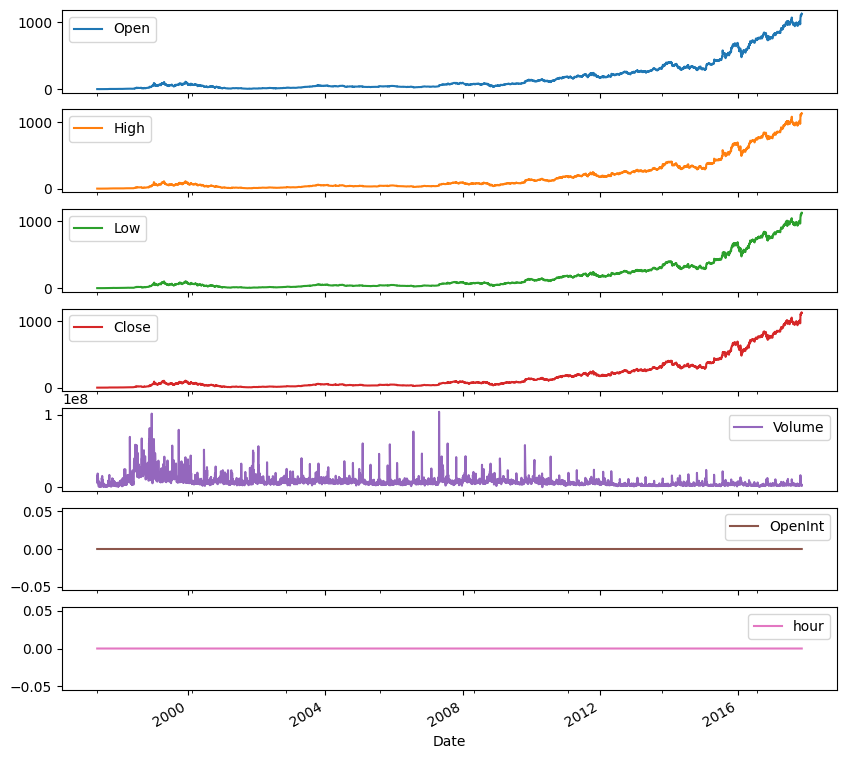

In [5]:
amzn_information.plot(subplots=True, figsize=(10, 10));

there is trends over open, high, low, close line, becasue a linear relationship can be seen from graph. After 2016, step change happened over four columns

Text(0.5, 0, 'Date')

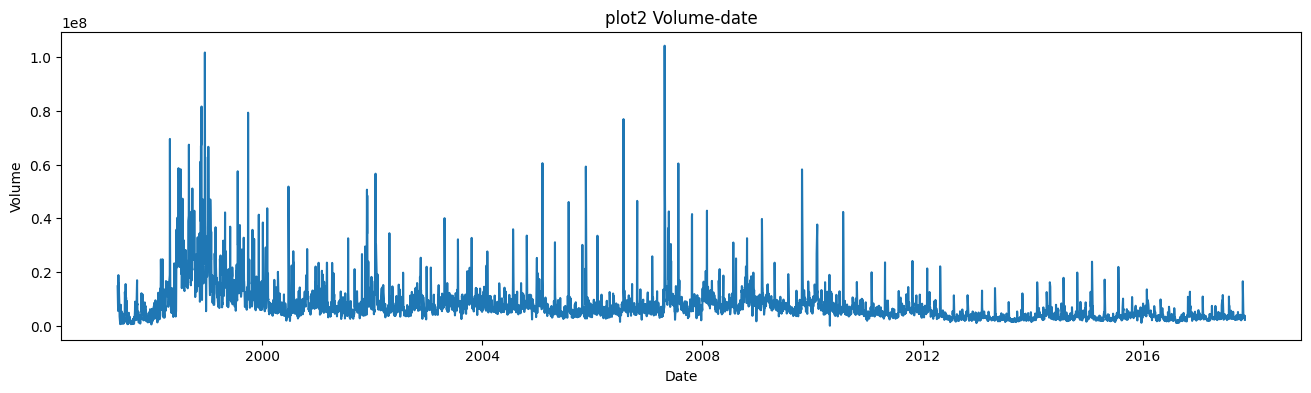

In [6]:
plt.figure(figsize=(16,4))
plt.plot(amzn_information['Volume'])
plt.title('plot2 Volume-date')
plt.ylabel('Volume')
plt.xlabel('Date')

Text(0, 0.5, 'Volume')

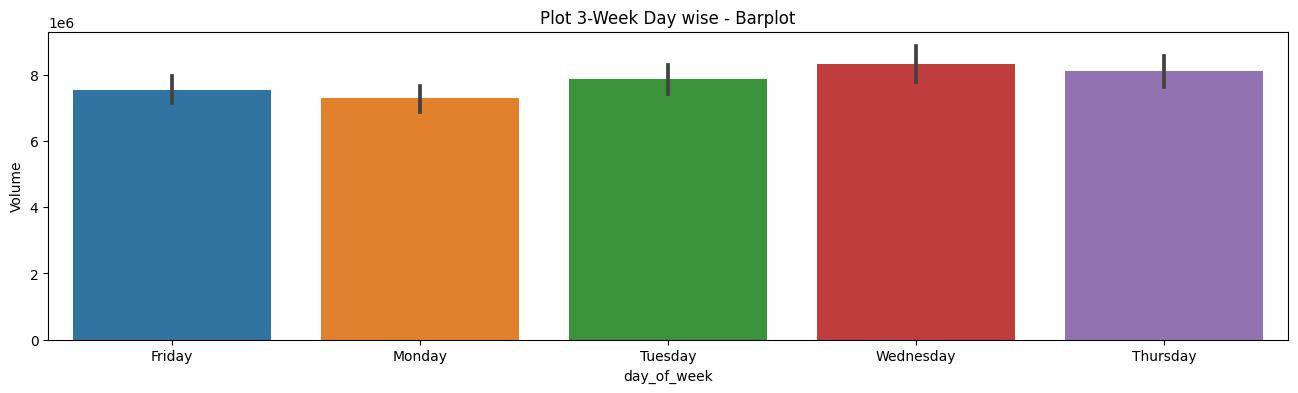

In [7]:
# Barplot to view 2020 weekly energy demand 
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=amzn_information, x='day_of_week', y=amzn_information['Volume'],ax=axes[0,0])
axes[0,0].set_title("Plot 3-Week Day wise - Barplot")
axes[0,0].set_xlabel('day_of_week')
axes[0,0].set_ylabel('Volume')

from two figures, Volume is more like a seanonality with outliers.

Text(0, 0.5, 'Open price')

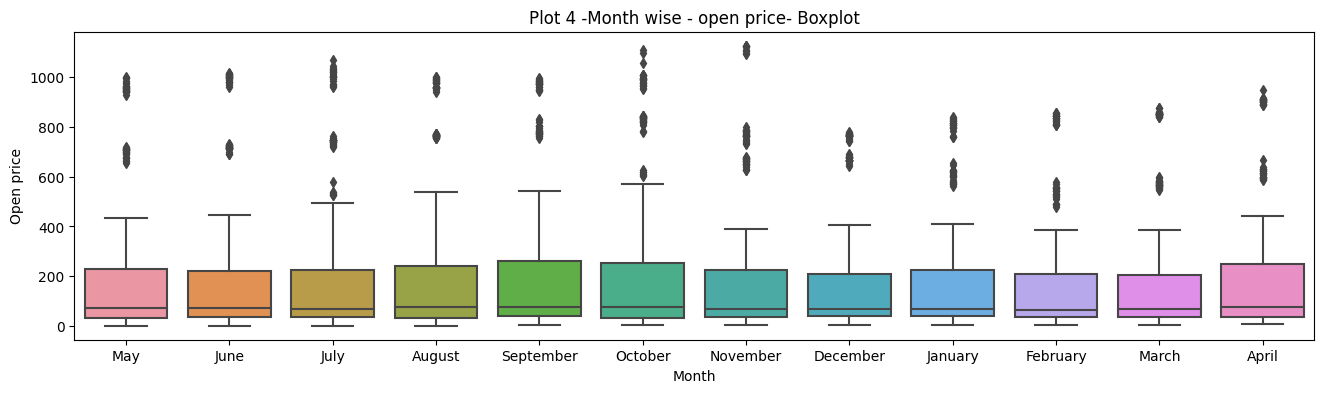

In [8]:
# Boxplot to view 2020 monthly energy demand 
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=amzn_information, x='month', y=amzn_information['Open'], ax = ax)
ax.set_title("Plot 4 -Month wise - open price- Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Open price')

during a year, there are many outliers for every month. they are unexpected values and does not align with expected patterns in series.

In [9]:
# correlation heatmap
numeric_data = amzn_information[["Open", "High", "Low", 
                              "Close","Volume"]]

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,Open,High,Low,Close,Volume
Open,1.000000,0.999940,0.999916,0.999864,-0.299983
High,0.999940,1.000000,0.999902,0.999936,-0.297974
Low,0.999916,0.999902,1.000000,0.999939,-0.301425
Close,0.999864,0.999936,0.999939,1.000000,-0.299428
Volume,-0.299983,-0.297974,-0.301425,-0.299428,1.000000


from grid table, it tells Open, High, Low, Close columns which have high correlations with each other, Volume column has low correlations with other columns

# question3

# (a)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Construct new df train 
df_am = pd.DataFrame(amzn_information['Volume'][:'2017-8-31'])

# rename the amzn_information column
df_am.rename(columns = {'Volume':'Volume'}, inplace = True)

# have to re-cast the index as a datetime object
df_am.index = df_am.index.astype('datetime64[ns]')




# Construct new df
df_am_test = pd.DataFrame(amzn_information['Volume']['2017-9-01':])

# rename the amzn_information column
df_am_test.rename(columns = {'Volume':'Volume'}, inplace = True)

# have to re-cast the index as a datetime object
df_am_test.index = df_am_test.index.astype('datetime64[ns]')




In [12]:
df_am

,Volume
Date,
1997-05-16,14700000
1997-05-19,6106800
1997-05-20,5467200
1997-05-21,18853200
1997-05-22,11776800
...,...
2017-08-25,3318454
2017-08-28,2580401
2017-08-29,2871789


## (b)

### automated modelling approach

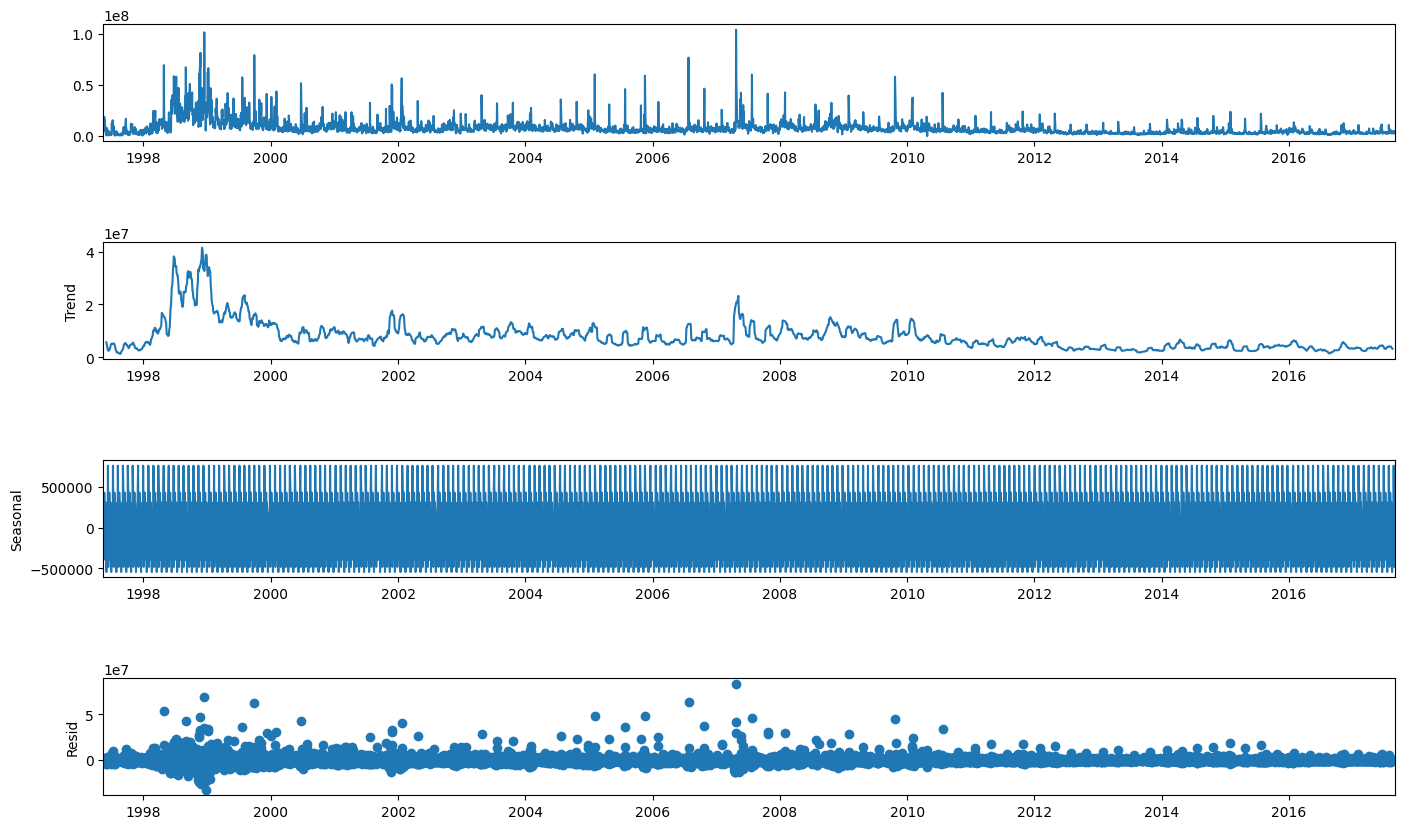

In [13]:
# Resample volume to month observations
# automated modelling approach 
# 5*4 is 4 weeks per month with 5 work days 
str_res = seasonal_decompose(df_am, period = (5*4))
fig = str_res.plot()
fig.set_size_inches((16, 9))

In [14]:
print(df_am)

              Volume
Date                
1997-05-16  14700000
1997-05-19   6106800
1997-05-20   5467200
1997-05-21  18853200
1997-05-22  11776800
...              ...
2017-08-25   3318454
2017-08-28   2580401
2017-08-29   2871789
2017-08-30   2898148
2017-08-31   3327043

[5103 rows x 1 columns]


### STR decomposition process manually

### 3.1 Isolate the trend

<AxesSubplot: xlabel='Date'>

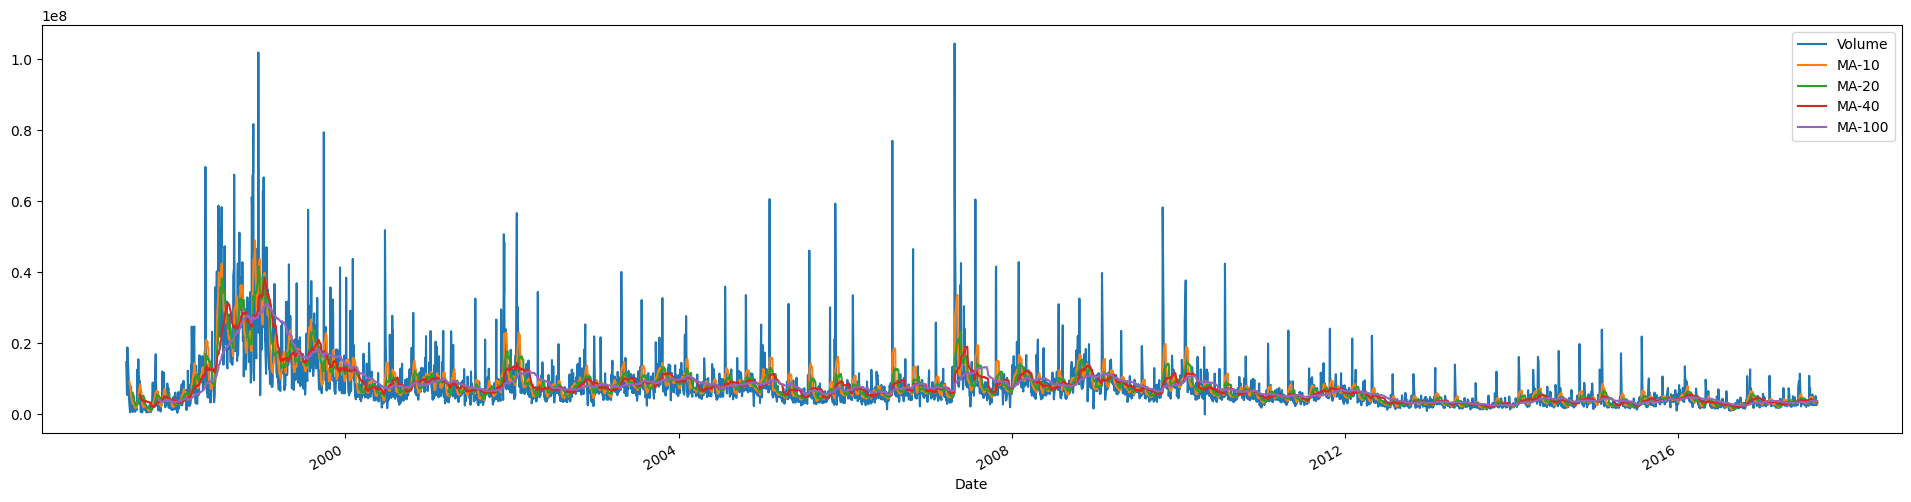

In [15]:
# We have around 20 observation for a month, so roll to 20 for one month and 20*2=40 for 2 month.
df_am['MA-10'] = df_am['Volume'].rolling(10).mean()
df_am['MA-20'] = df_am['Volume'].rolling(20).mean()
df_am['MA-40'] = df_am['Volume'].rolling(40).mean()
df_am['MA-100'] = df_am['Volume'].rolling(100).mean()
df_am[['Volume','MA-10','MA-20','MA-40','MA-100']].plot(figsize=(24,6))

<AxesSubplot: xlabel='Date'>

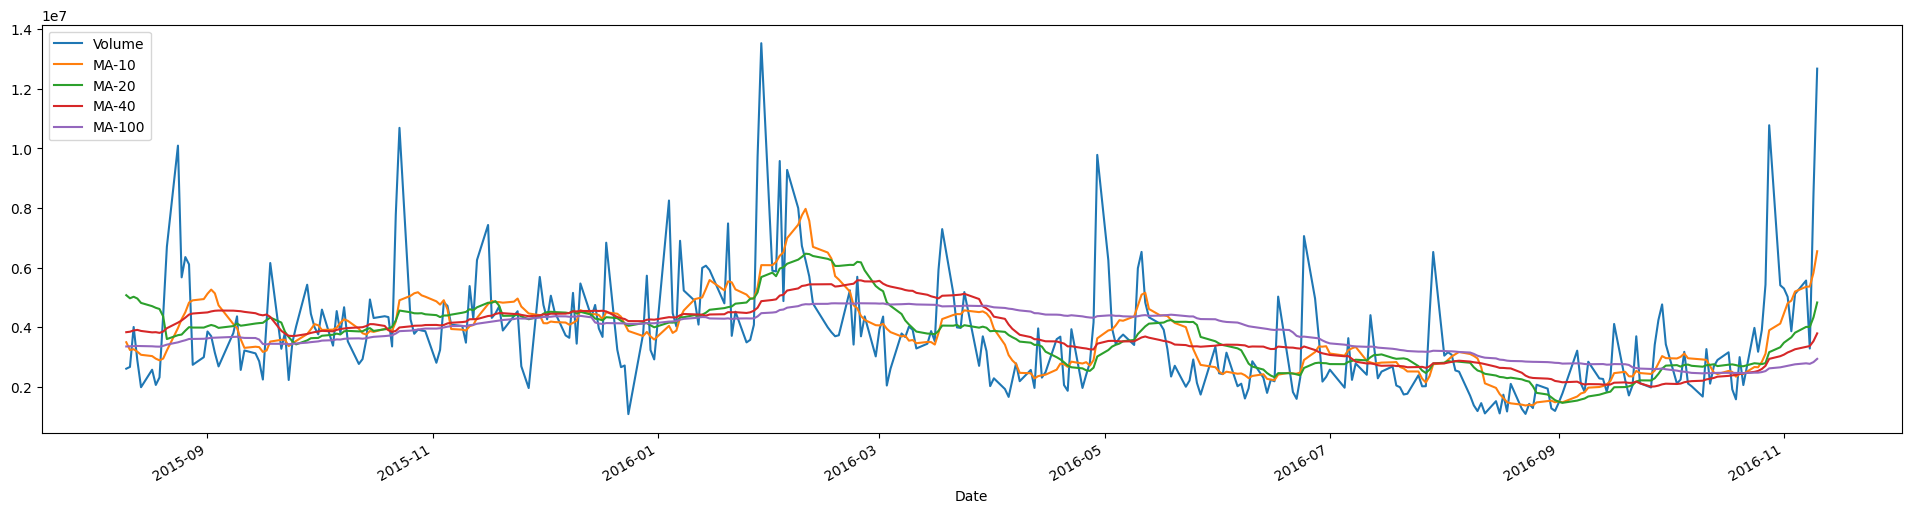

In [16]:
df_am['2015-8-10':'2016-11-10'][['Volume','MA-10','MA-20','MA-40','MA-100']].plot(figsize=(24,6))

the MA-10 is affected by seasonal information from time series, it is not good. MA-40 is smooth and leaving the seasonal away, but it is slowly respond to change. e.g In 2016-09, there is a big drop in map, but MA-40 does not repond to that change, lacking dynamism. Therefore, we consider MA-20 which is not affected bu seasonal information much and follow the trend.

### 3.2 Calculate the de-trended series

 subtract the MA trend from the original volume data.

<AxesSubplot: xlabel='Date'>

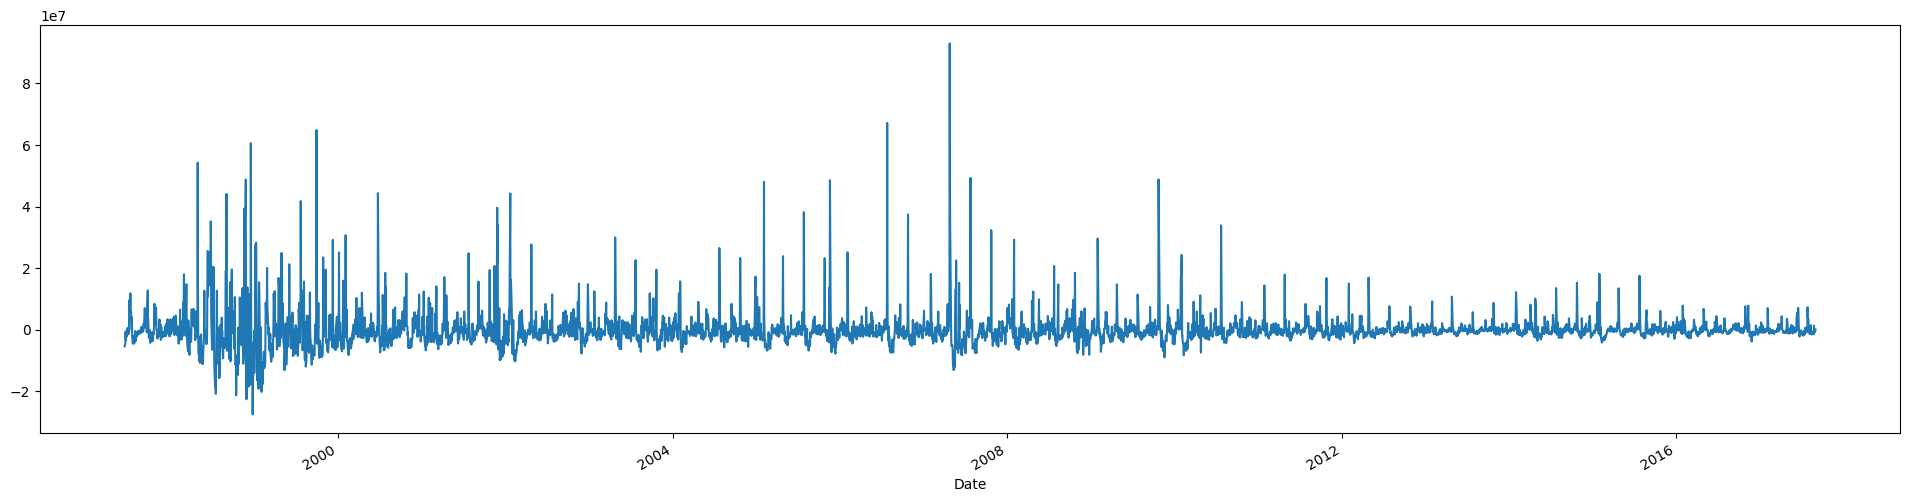

In [17]:
df_am['volume-detrended'] = df_am['Volume'] - df_am['MA-20']
df_am['volume-detrended'].plot(figsize=(24,6))

### 3.3 Estimate the seasonal component

 estimating the mean each month of the year, using the 'groupby' method from pandas.

<AxesSubplot: xlabel='Date'>

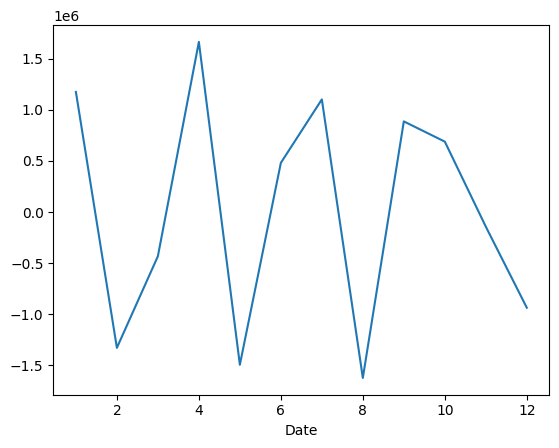

In [18]:
raw_month_means = df_am.groupby(df_am.index.month)['volume-detrended'].mean()
raw_month_means.plot()

<AxesSubplot: xlabel='Date'>

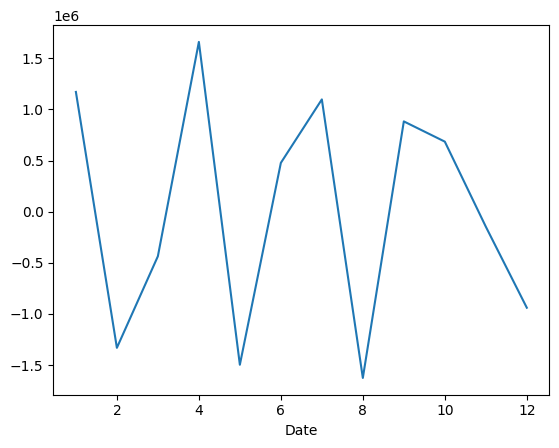

In [19]:
# Shift values so that seasonal components sum to zero
adjustment = raw_month_means.sum()/12.0 
month_means = raw_month_means - adjustment
month_means.plot()

C:\Users\Gatsby\AppData\Local\Temp\ipykernel_17180\4072045617.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  seasonal = np.insert(seasonal,0, month_means[0:3])


<AxesSubplot: xlabel='Date'>

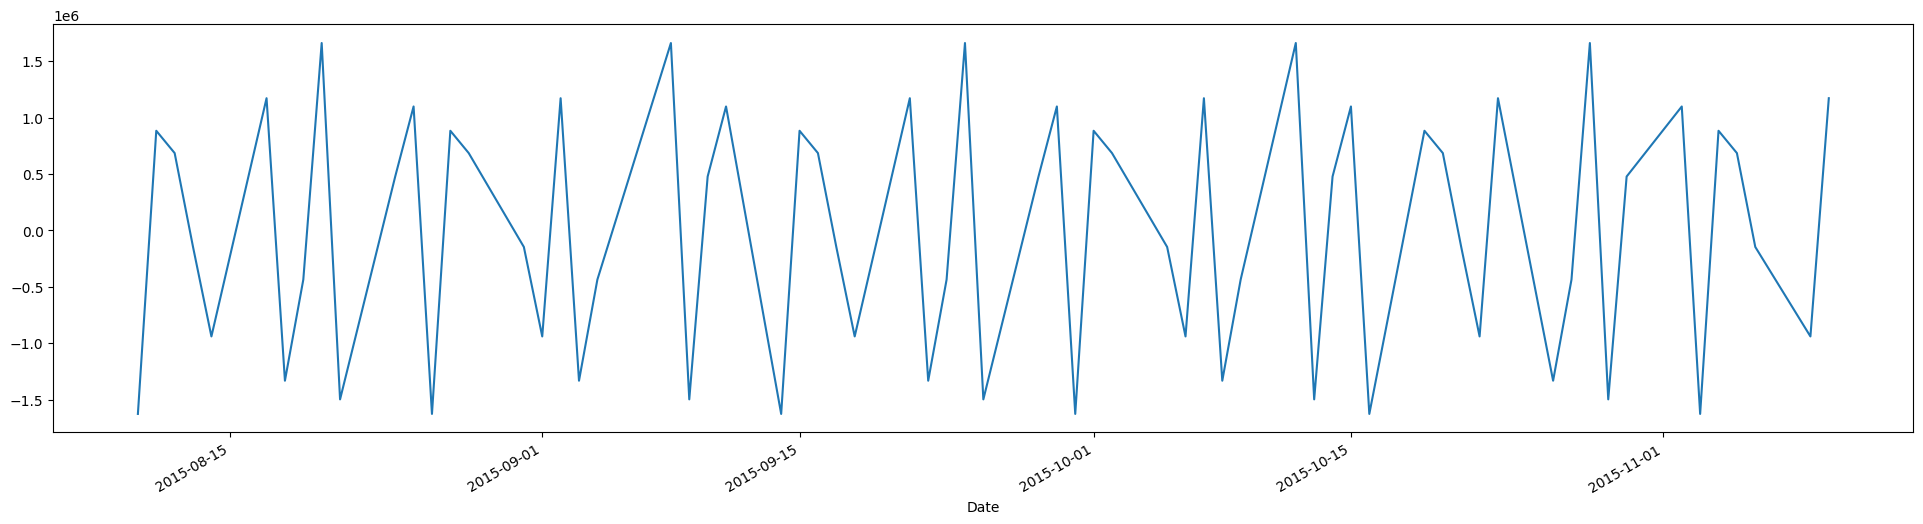

In [20]:
import numpy as np
# tile the values into the dataframe so that the entire series is filled
seasonal = np.tile(month_means,int(np.floor(len(df_am)/12)))
# used typeout to check lengths:

# Prepending one observation
seasonal = np.insert(seasonal,0, month_means[0:3])
# print(len(seasonal), len(df_am), len(month_means))
df_am['volume-seasonal'] = seasonal
df_am['2015-8-10':'2015-11-10']['volume-seasonal'].plot(figsize=(24,6))

### 3.4 Calculate the residual component 

The last step is to calulate the residual, by subtracting the seasonal component from the detrended data.

<AxesSubplot: xlabel='Date'>

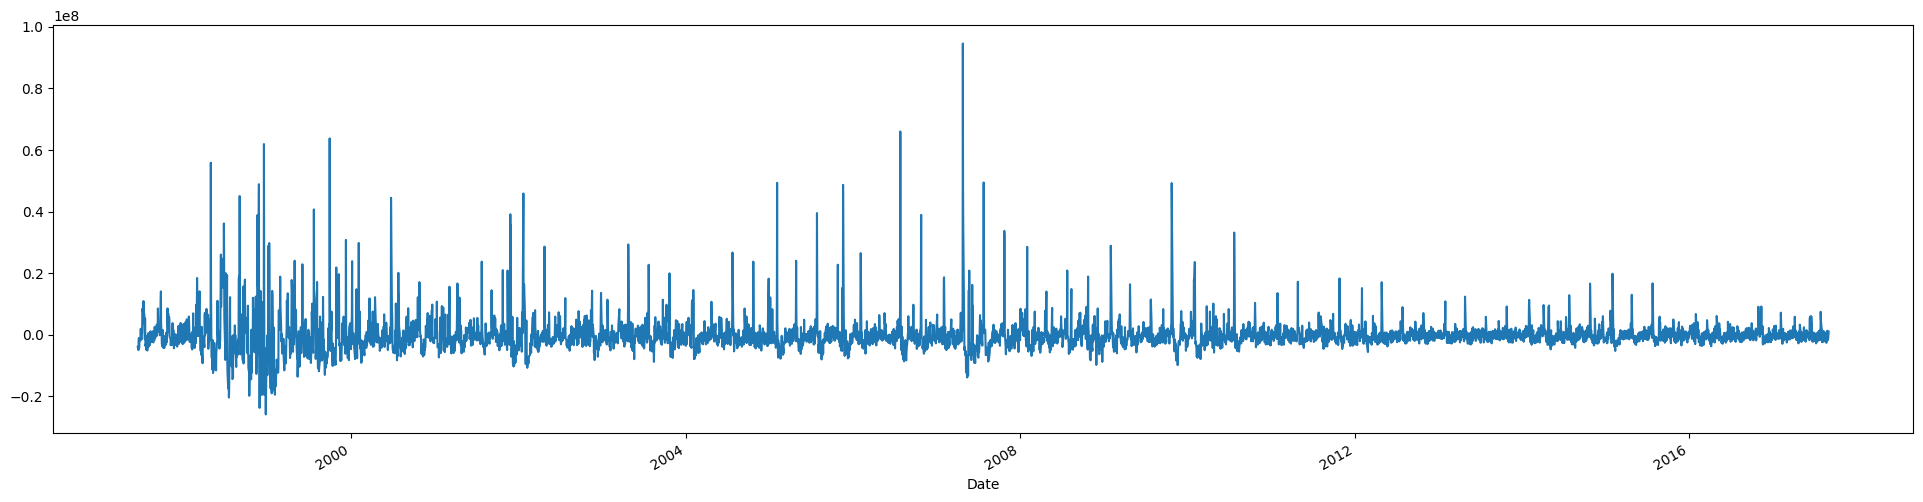

In [21]:
df_am['volume-residual'] = df_am['volume-detrended'] - df_am['volume-seasonal']
df_am['volume-residual'].plot(figsize=(24,6))

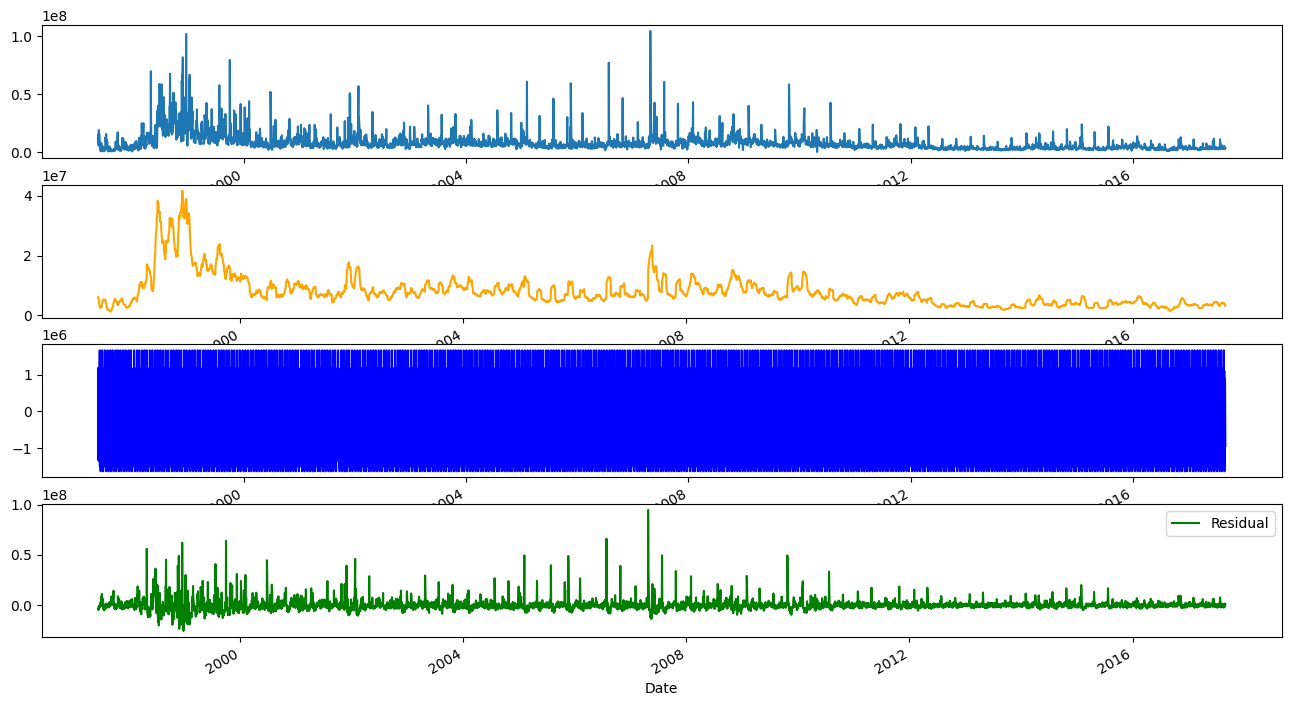

In [22]:
import matplotlib.pyplot as plt
fig, ax_str = plt.subplots(4)
df_am['Volume'].plot(label='Original', ax=ax_str[0])
df_am['MA-20'].plot(color='orange', label='MA-20 Trend', ax=ax_str[1])
df_am['volume-seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
df_am['volume-residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

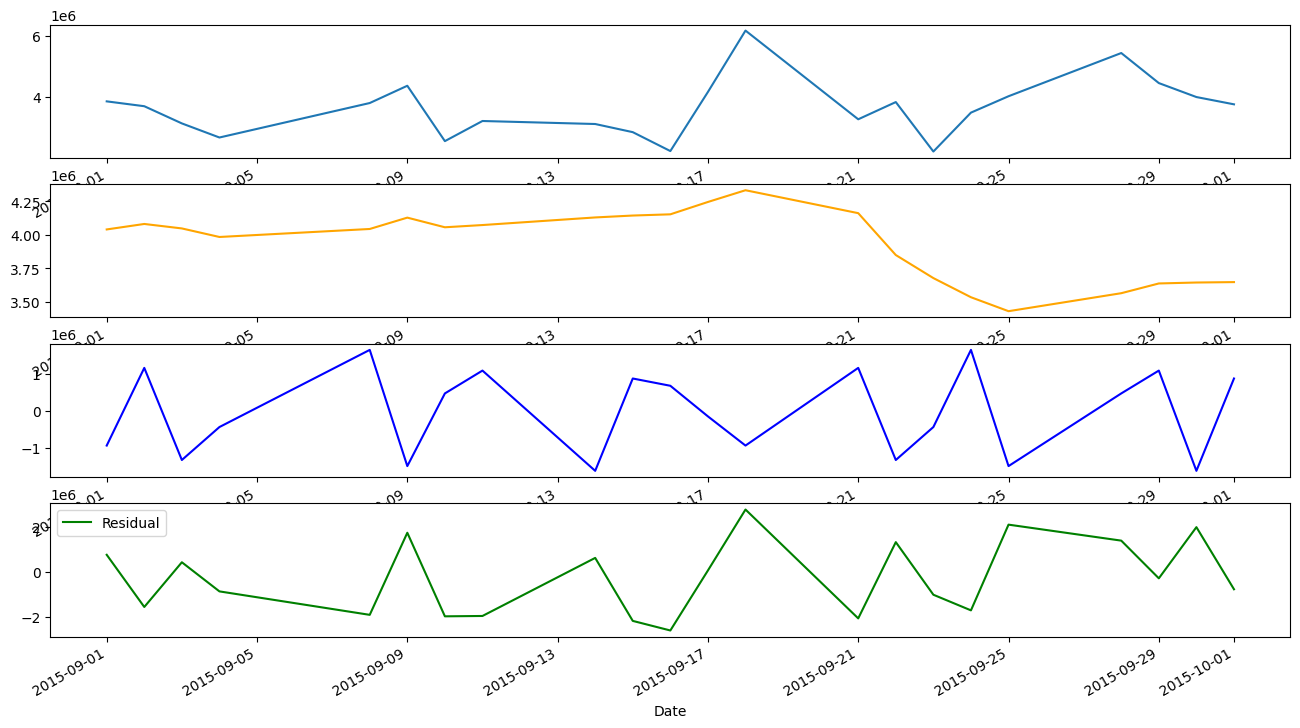

In [23]:
fig, ax_str_2 = plt.subplots(4)
df_am['Volume']['2015-09-01':'2015-10-01'].plot(label='Original', ax=ax_str_2[0])
df_am['MA-20']['2015-09-01':'2015-10-01'].plot(color='orange', label='MA-20 Trend', ax=ax_str_2[1])
df_am['volume-seasonal']['2015-09-01':'2015-10-01'].plot(color='blue', label='Seasonal', ax=ax_str_2[2])
df_am['volume-residual']['2015-09-01':'2015-10-01'].plot(color='green', label= 'Residual', ax=ax_str_2[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

compared with my manual process, automated modelling approach is better for there is no additional information in residual. In my final result, residuals seems still contain the seasonal information. 

#  question 4

## Modelling trends with ARIMA

#### 1.Check for stationarity

To fig an autoregressive model or an ARIMA model that contains an AR component, the data must be stationary.
We want to model the trend of the volume data with an ARIMA model, so we have to first check that it is stationary by looking at its plot.

<AxesSubplot: xlabel='Date'>

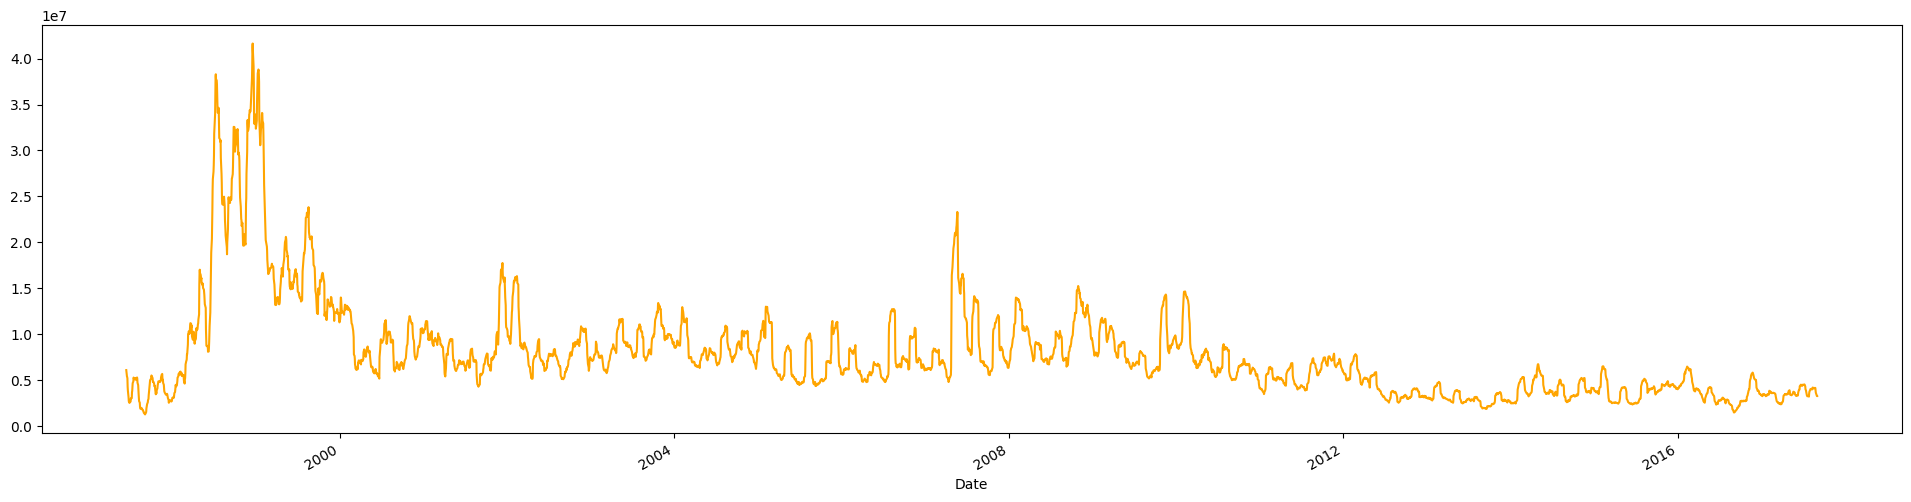

In [24]:
df_am['MA-20'].plot(color='orange', figsize=(24,6))

I think it is not Stationary. differencing it.

<AxesSubplot: xlabel='Date'>

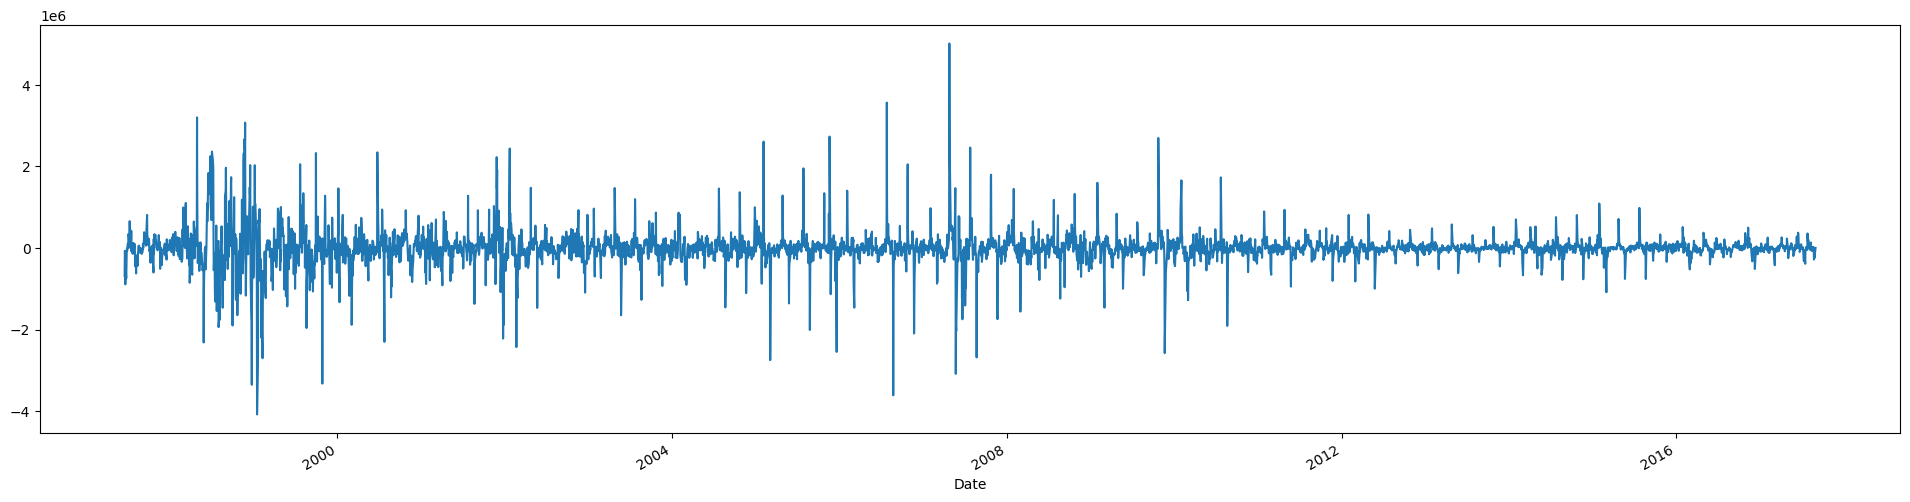

In [25]:
trend_d1 = df_am['MA-20'].diff()
trend_d1.plot(figsize=(24,6))

This still contains lots of sub-series where the mean value moves up and down, and the variance is not constant, therefore, we need to difference it again.

<AxesSubplot: xlabel='Date'>

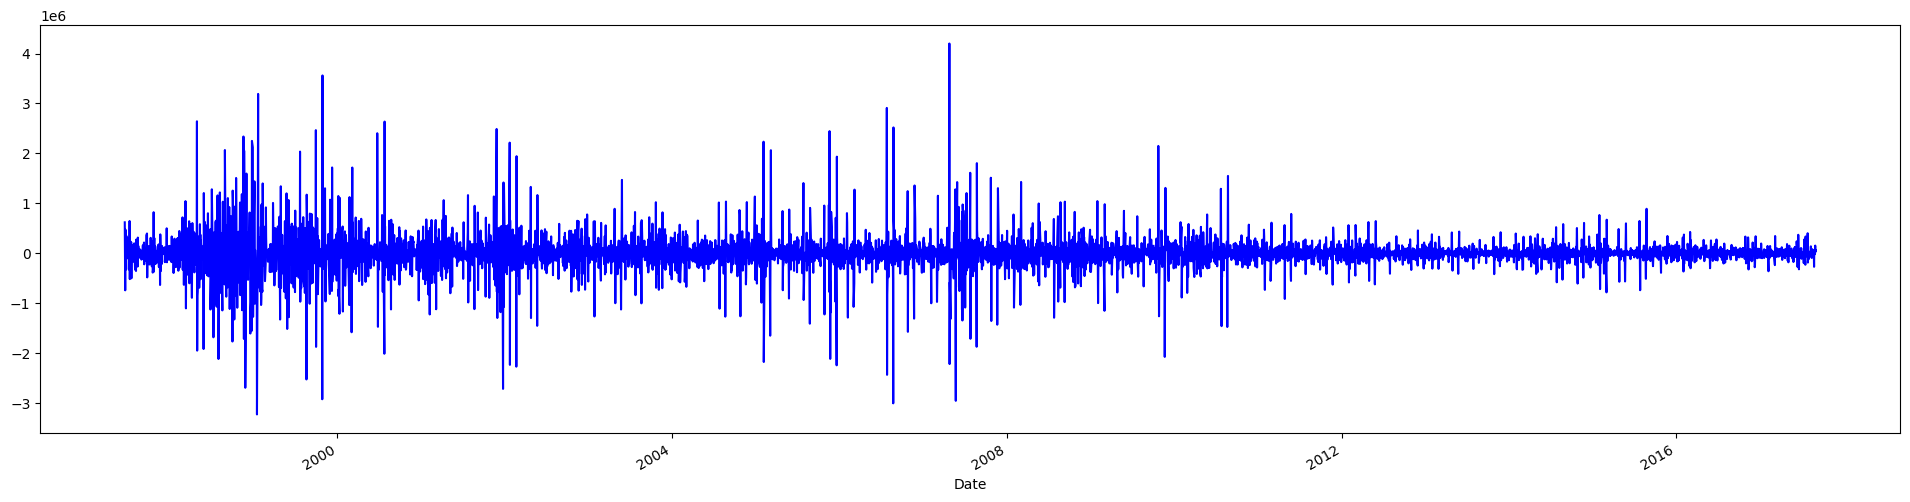

In [26]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6),color='blue',)

it is still not perfect, but it is enough to be applied to an ARIMA model. (d = 2.)

#### 2. Fit a lower order model

Check if there is any evidence of autocorrelation in the data using the ACF and PCF plots

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [28]:
trend_d2 = trend_d2[21:]

In [29]:
trend_d2

Date
1997-06-17    619320.0
1997-06-18    -80100.0
1997-06-19   -742380.0
1997-06-20    473040.0
1997-06-23   -325020.0
                ...   
2017-08-25     64663.7
2017-08-28    -18337.4
2017-08-29    153041.3
2017-08-30     26253.9
2017-08-31     61979.8
Name: MA-20, Length: 5082, dtype: float64

In [30]:
trend_d1.head(21)

Date
1997-05-16         NaN
1997-05-19         NaN
1997-05-20         NaN
1997-05-21         NaN
1997-05-22         NaN
1997-05-23         NaN
1997-05-27         NaN
1997-05-28         NaN
1997-05-29         NaN
1997-05-30         NaN
1997-06-02         NaN
1997-06-03         NaN
1997-06-04         NaN
1997-06-05         NaN
1997-06-06         NaN
1997-06-09         NaN
1997-06-10         NaN
1997-06-11         NaN
1997-06-12         NaN
1997-06-13         NaN
1997-06-16   -689340.0
Name: MA-20, dtype: float64

E:\Language\python3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


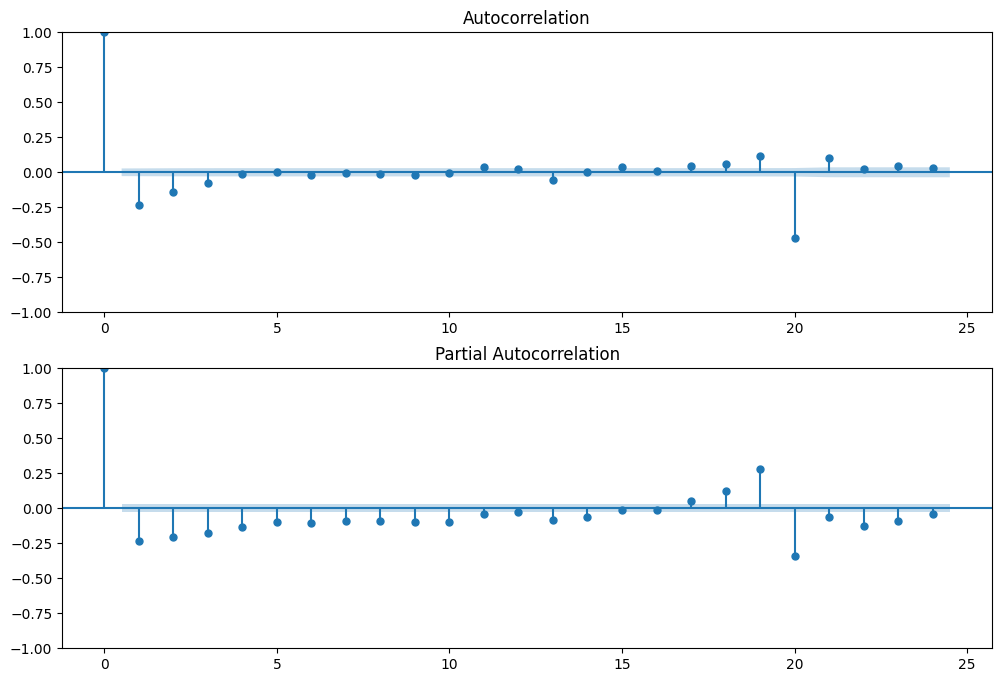

In [31]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d2, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d2, lags=24, ax=ax2)

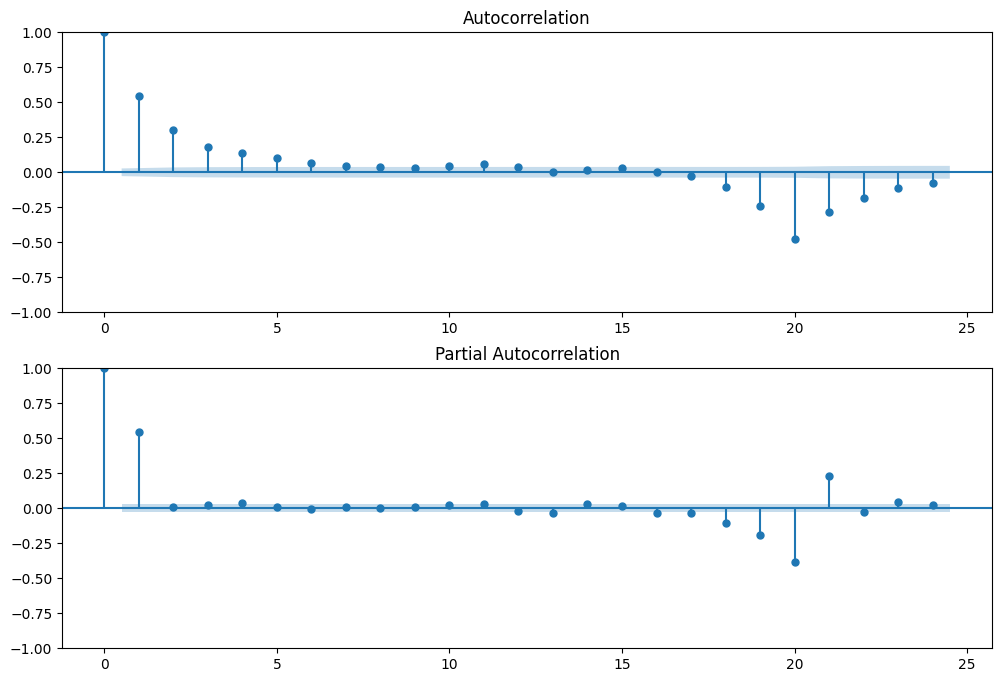

In [32]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1[22:], lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1[22:], lags=24, ax=ax2)

adjusting the data to prepare for use of ARIMA model

In [33]:
train2 = df_am.reindex(pd.date_range(start='1997-05-15',end='2017-08-31',freq='D'),method='ffill')

In [34]:
train2 = train2[29:]

In [35]:
train2

,Volume,MA-10,MA-20,MA-40,MA-100,volume-detrended,volume-seasonal,volume-residual
1997-06-13,693600.0,2965920.0,6091980.00,NaN,NaN,-5398380.00,-1.496742e+06,-3.901638e+06
1997-06-14,693600.0,2965920.0,6091980.00,NaN,NaN,-5398380.00,-1.496742e+06,-3.901638e+06
1997-06-15,693600.0,2965920.0,6091980.00,NaN,NaN,-5398380.00,-1.496742e+06,-3.901638e+06
1997-06-16,913200.0,2998080.0,5402640.00,NaN,NaN,-4489440.00,4.774174e+05,-4.966857e+06
1997-06-17,4706400.0,3350400.0,5332620.00,NaN,NaN,-626220.00,1.098052e+06,-1.724272e+06
...,...,...,...,...,...,...,...,...
2017-08-27,3318454.0,3264964.0,3639186.70,3683914.525,3796314.48,-320732.70,-1.625701e+06,1.304969e+06
2017-08-28,2580401.0,3206152.3,3401613.15,3663790.700,3748149.95,-821212.15,8.829834e+05,-1.704196e+06
2017-08-29,2871789.0,3238864.0,3317080.90,3662857.725,3714974.73,-445291.90,6.851464e+05,-1.130438e+06
2017-08-30,2898148.0,3216099.5,3258802.55,3644083.850,3706846.99,-360654.55,-1.464481e+05,-2.142065e+05


#### 4.2 Fit your first ARIMA model

starting with p =1 and q=0.

In [36]:
# df_am['MA-20'] trend_d2
# df_am.index = pd.DatetimeIndex(df_am.index).to_period('M')
arima_1_2_0 = ARIMA(train2['MA-20'], order=(1, 2, 0)).fit()
print(arima_1_2_0.summary())


                               SARIMAX Results                                
Dep. Variable:                  MA-20   No. Observations:                 7385
Model:                 ARIMA(1, 2, 0)   Log Likelihood             -104711.500
Date:                Mon, 07 Nov 2022   AIC                         209427.000
Time:                        14:08:00   BIC                         209440.814
Sample:                    06-13-1997   HQIC                        209431.747
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2850      0.004    -76.877      0.000      -0.292      -0.278
sigma2      1.216e+11   1.69e-15   7.18e+25      0.000    1.22e+11    1.22e+11
Ljung-Box (L1) (Q):                  57.58   Jarque-

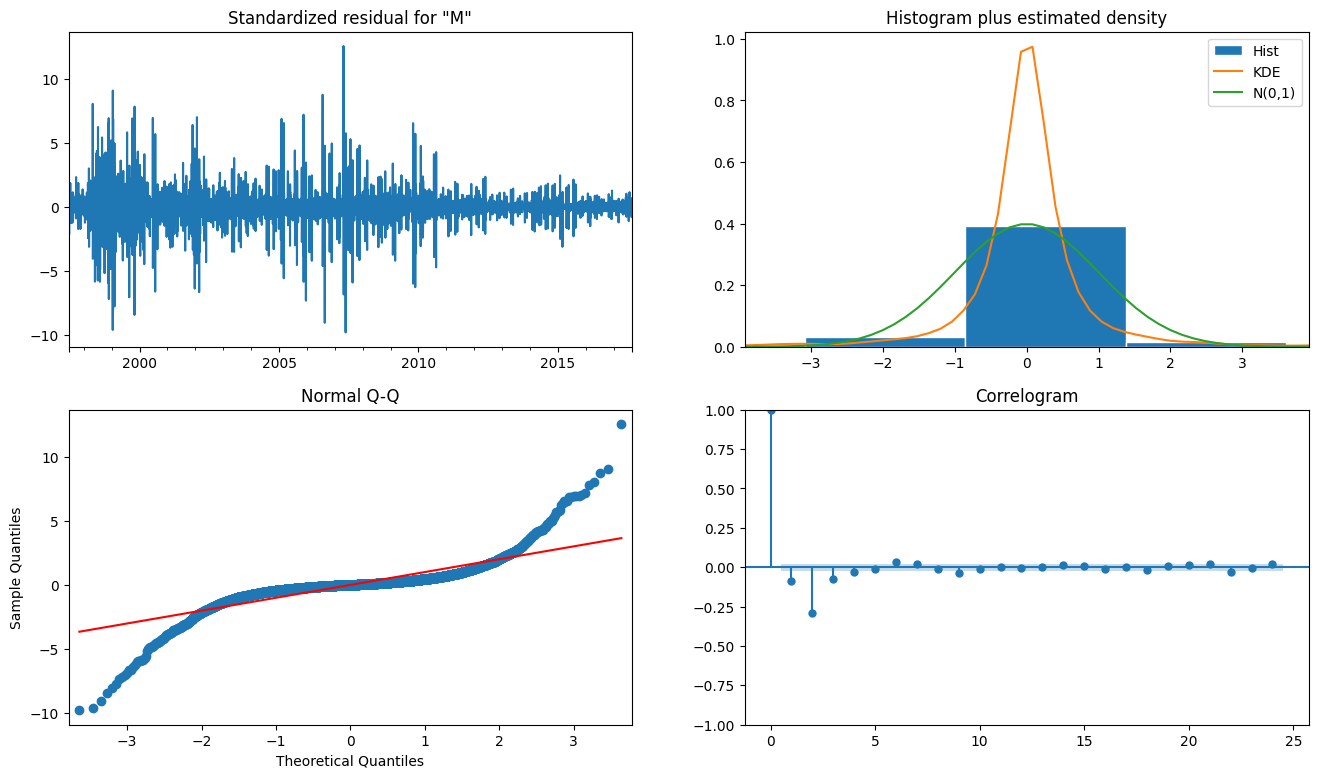

In [37]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_2_0.plot_diagnostics(fig=fig, lags=24)

#### 4.3 Fit higher-order models

Increase the AR lag parameter and re-fit

In [38]:
arima_2_2_0 = ARIMA(train2['MA-20'], order=(2, 2, 0)).fit()
print(arima_2_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-20   No. Observations:                 7385
Model:                 ARIMA(2, 2, 0)   Log Likelihood             -104426.533
Date:                Mon, 07 Nov 2022   AIC                         208859.067
Time:                        14:08:01   BIC                         208879.787
Sample:                    06-13-1997   HQIC                        208866.188
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3702      0.004    -88.975      0.000      -0.378      -0.362
ar.L2         -0.2651      0.004    -63.816      0.000      -0.273      -0.257
sigma2      1.122e+11   3.38e-15   3.32e+25      0.0

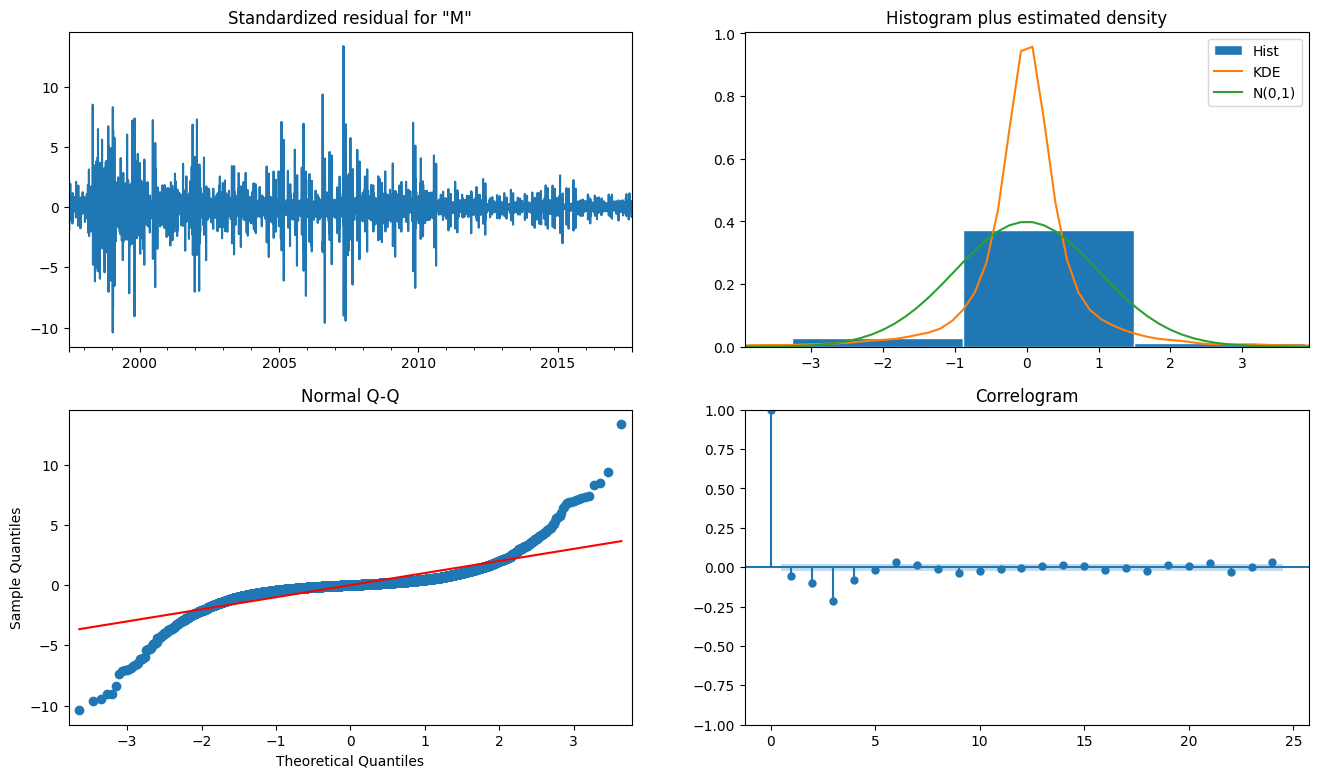

In [39]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_0.plot_diagnostics(fig=fig, lags=24)

increasing the MA term to q=1:

### 4.4 Compare the goodness of fit, then continue

In [40]:
arima_2_2_1 = ARIMA(train2['MA-20'], order=(2, 2, 1)).fit()
print(arima_2_2_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-20   No. Observations:                 7385
Model:                 ARIMA(2, 2, 1)   Log Likelihood             -103842.292
Date:                Mon, 07 Nov 2022   AIC                         207692.584
Time:                        14:08:03   BIC                         207720.211
Sample:                    06-13-1997   HQIC                        207702.078
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4339      0.005     79.657      0.000       0.423       0.445
ar.L2          0.0082      0.008      1.097      0.273      -0.006       0.023
ma.L1         -0.9998      0.003   -311.502      0.0

The AIC has continued to drop, now with a score of  207692.584 for the ARIMA(2,2,1) model, down from 209427 for ARIMA(2,2,0).

In [41]:
arima_3_2_0 = ARIMA(train2['MA-20'], order=(3, 2, 0)).fit()
print(arima_3_2_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-20   No. Observations:                 7385
Model:                 ARIMA(3, 2, 0)   Log Likelihood             -104284.553
Date:                Mon, 07 Nov 2022   AIC                         208577.106
Time:                        14:08:04   BIC                         208604.734
Sample:                    06-13-1997   HQIC                        208586.601
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4228      0.004    -98.331      0.000      -0.431      -0.414
ar.L2         -0.3413      0.005    -65.029      0.000      -0.352      -0.331
ar.L3         -0.1889      0.005    -39.844      0.0

Therefore, ARIMA(2,2,1) is good for our use compared with arima_3_2_0

## b.Forecasting with ARIMA

In [42]:
arima_fcst = arima_2_2_1.get_forecast(steps=48)
arima_predictions = pd.DataFrame(arima_fcst.predicted_mean)
arima_predictions.rename(columns={"predicted_mean": "trend"}, inplace=True)


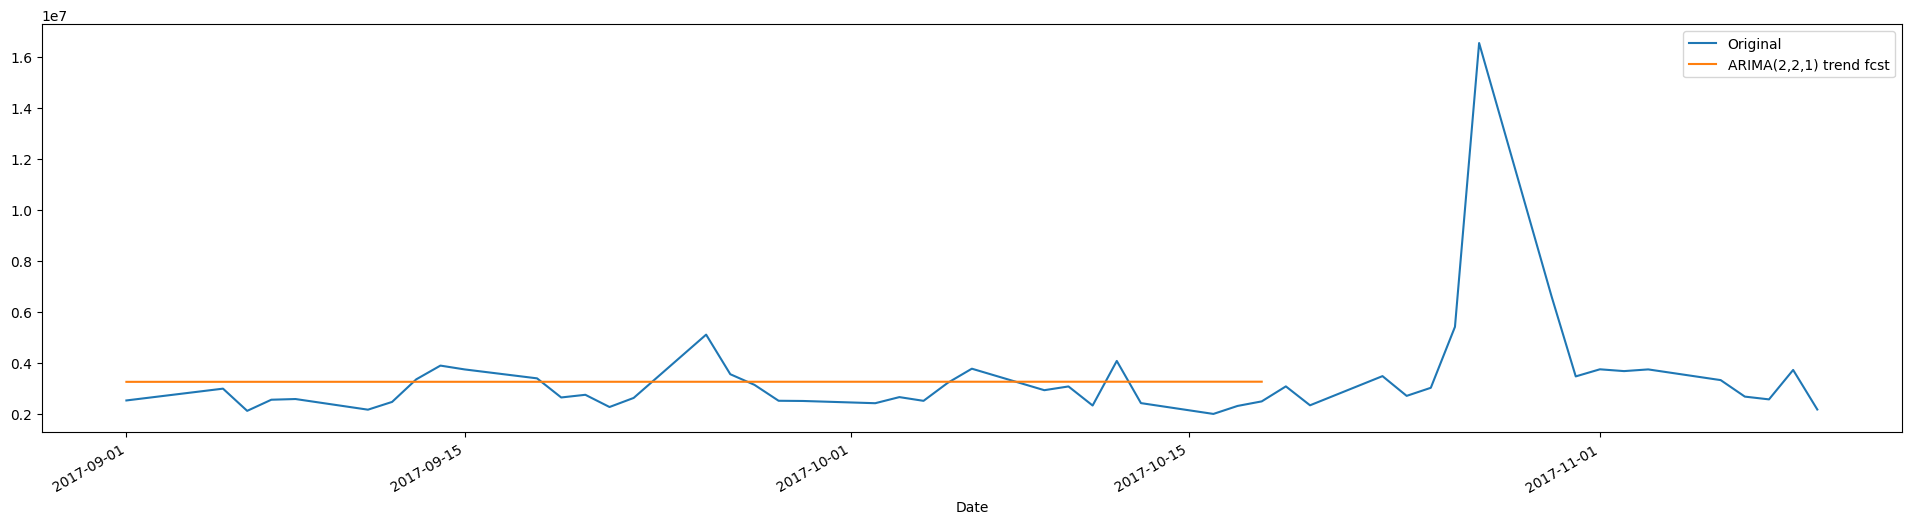

In [43]:

fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
# df_am_test['2017-9-1':'2017-11-10']['Volume'].plot(label='Original', ax=ax_arima_fcst)
df_am_test['2017-9-1':'2017-11-10']['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,2,1) trend fcst", ax=ax_arima_fcst)
plt.legend()

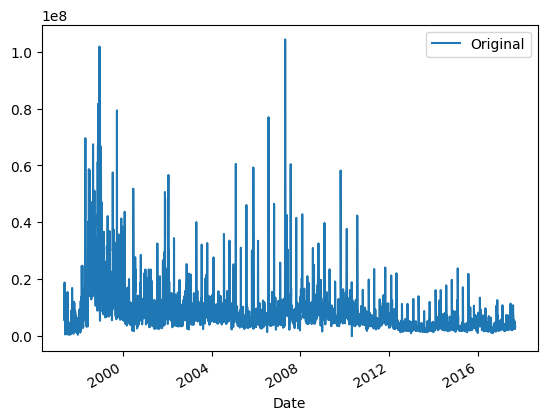

In [44]:
df_am['Volume'].plot(label='Original')
plt.legend()

In [45]:
month_means_pred = seasonal = np.tile(month_means, 4)

In [46]:
print(len(month_means_pred))
print(len(arima_predictions))

48
48


In [47]:
arima_predictions['seasonal'] = month_means_pred.tolist()
arima_predictions.head()

,trend,seasonal
2017-09-01,3.263687e+06,1.171302e+06
2017-09-02,3.264287e+06,-1.331354e+06
2017-09-03,3.264615e+06,-4.358030e+05
2017-09-04,3.264819e+06,1.660303e+06
2017-09-05,3.264967e+06,-1.496742e+06


In [48]:
arima_predictions['trend+seasonal'] = arima_predictions['trend'] + arima_predictions['seasonal']
arima_predictions.head()

,trend,seasonal,trend+seasonal
2017-09-01,3.263687e+06,1.171302e+06,4.434988e+06
2017-09-02,3.264287e+06,-1.331354e+06,1.932934e+06
2017-09-03,3.264615e+06,-4.358030e+05,2.828812e+06
2017-09-04,3.264819e+06,1.660303e+06,4.925122e+06
2017-09-05,3.264967e+06,-1.496742e+06,1.768226e+06


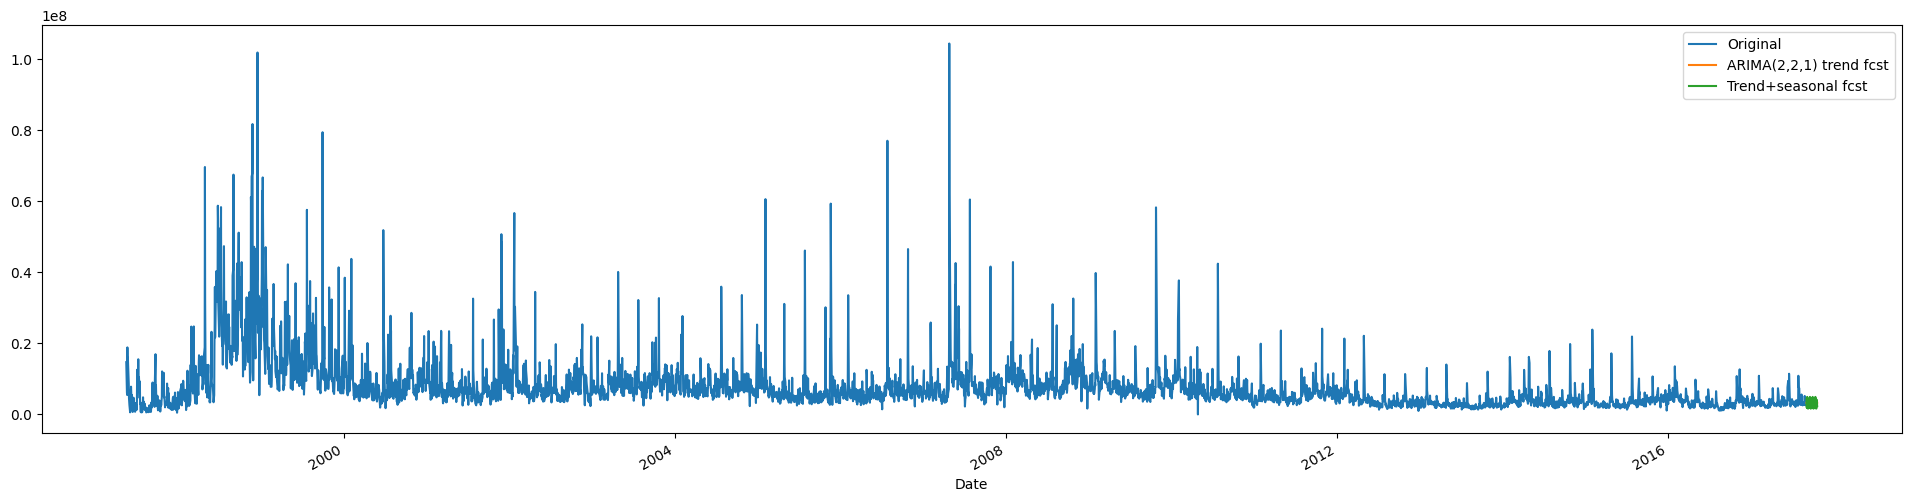

In [49]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_am['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,2,1) trend fcst", ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(label="Trend+seasonal fcst", ax=ax_arima_fcst)
plt.legend()

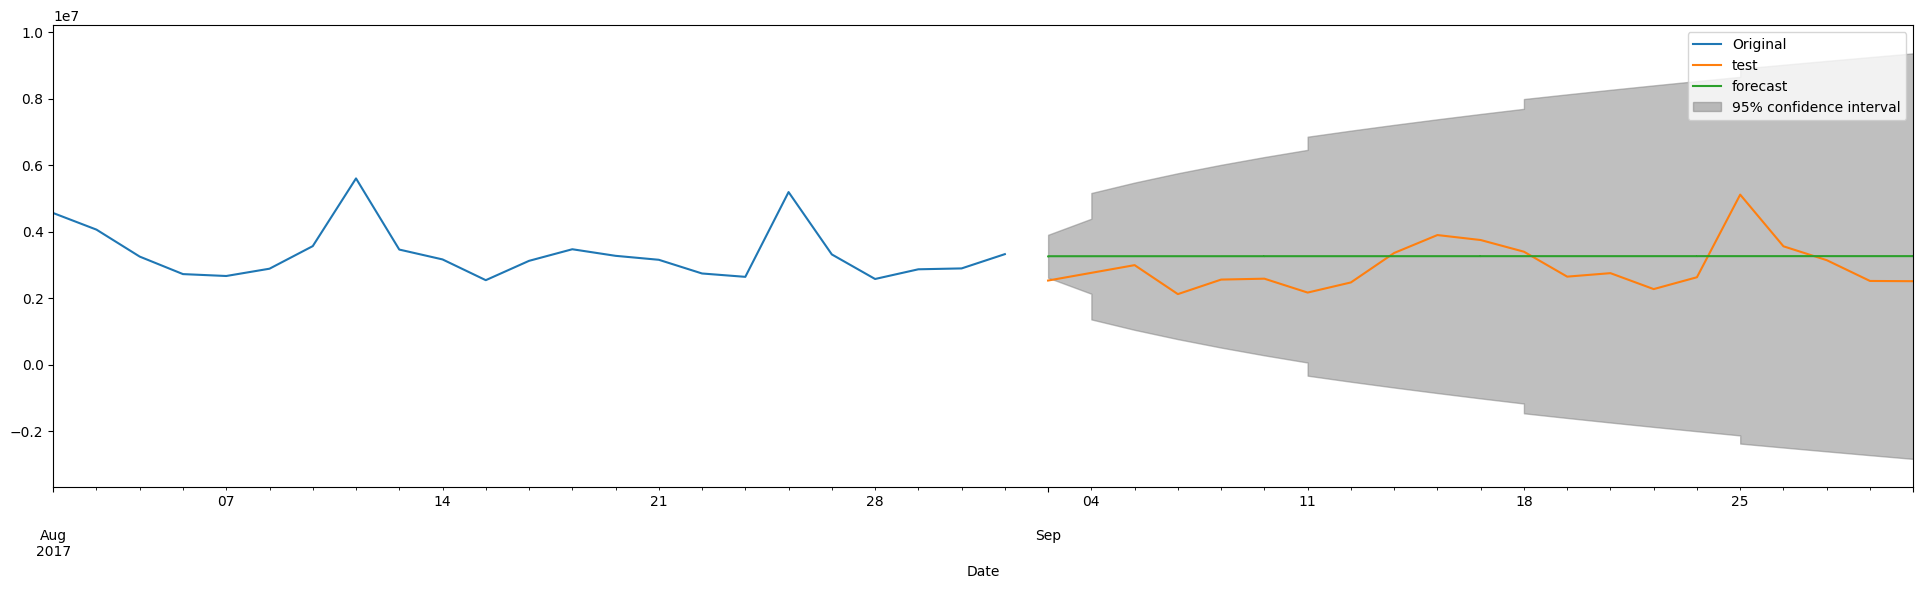

In [50]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_am["2017-08-01":"2017-08-31"]['Volume'].plot(label='Original', ax=ax_arima_fcst)
df_am_test['2017-9-1':'2017-10-1']['Volume'].plot(label='test', ax=ax_arima_fcst)
fig = plot_predict(arima_2_2_1, start="2017-09-01", end="2017-10-1", label='ARIMA(2,2,1) Forecast', ax=ax_arima_fcst)

In [51]:
arima_predictions = pd.concat([arima_predictions,arima_fcst.conf_int()], axis = 1)
arima_predictions.rename(columns={"lower MA-20": "trend lower CI", "upper MA-20": "trend upper CI"}, inplace=True)


In [52]:
arima_predictions["seasonal lower CI"] = arima_predictions["trend lower CI"] + arima_predictions['seasonal']
arima_predictions["seasonal upper CI"] = arima_predictions["trend upper CI"] + arima_predictions['seasonal']


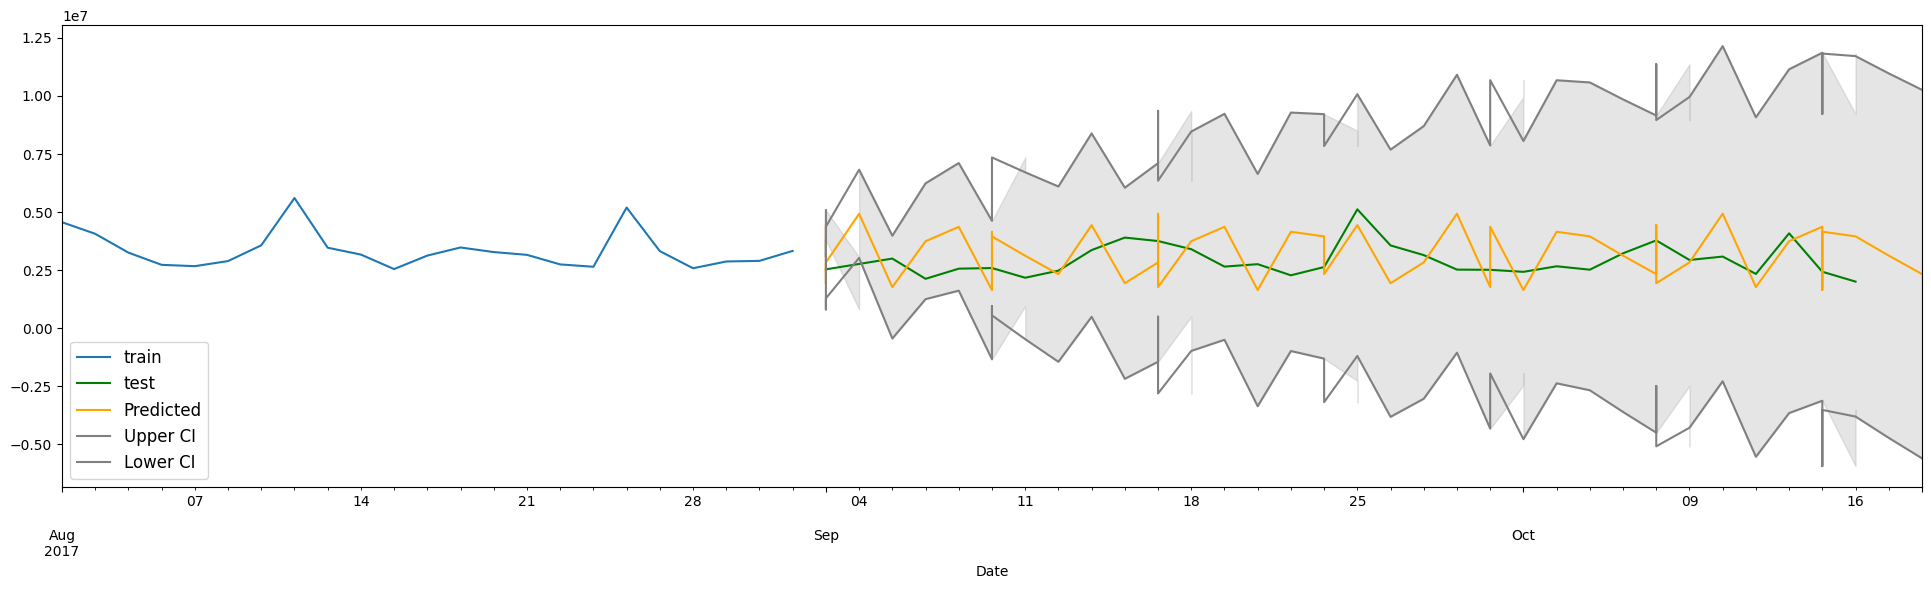

In [53]:
x = arima_predictions.index.values
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_am["2017-08-01":"2017-08-31"]['Volume'].plot(label='train', ax=ax_arima_fcst)
df_am_test['2017-9-1':'2017-10-16']['Volume'].plot(color = 'green',label='test', ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(color = 'orange',label = 'Predicted' )
arima_predictions['seasonal upper CI'].plot(color = 'grey', label = 'Upper CI')
arima_predictions['seasonal lower CI'].plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)

# fill between the conf intervals
plt.fill_between(x, arima_predictions['seasonal lower CI'], arima_predictions['seasonal upper CI'], color='grey', alpha=0.2)

# question5

## a.1 Prepare the data

forcasting trend component of the volume training data by neural network

In [54]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [55]:
# Construct new df train 
df_train5 = pd.DataFrame(df_am['MA-20'])


# have to re-cast the index as a datetime object
df_train5.index = df_am.index.astype('datetime64[ns]')

In [56]:
data = pd.concat([df_train5, 
                 df_train5.shift(), 
                 df_train5.shift(2),
                 df_train5.shift(3),
                 df_train5.shift(4)], 
                 axis=1
                 ).dropna()

In [57]:
data_np = np.array(data)


In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
# df_am.isna().sum()


In [59]:
# train test split, we can take last 1000 data points as test set
# data_np[0:-4123] is the training data (df_am) from task3
# data_np[-4123:] is the test data(df_am_test) from task3
train, test = data_np[0:-50], data_np[-50:]


# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# training data
y_train = train_scaled[:,0]
X_train = train_scaled[:,1:]

# test data
y_test = test_scaled[:,0]
X_test = test_scaled[:,1:]

In [60]:
# check X_train
X_train

array([[0.09700495, 0.10072276, 0.10245685, 0.11952878],
       [0.07490163, 0.09700495, 0.10072276, 0.10245685],
       [0.06451344, 0.07490163, 0.09700495, 0.10072276],
       ...,
       [0.07643555, 0.06714787, 0.06701615, 0.06596053],
       [0.07776657, 0.07643555, 0.06714787, 0.06701615],
       [0.07954687, 0.07776657, 0.07643555, 0.06714787]])

## 2 Configure the neural network

In [61]:
from tensorflow import keras

In [62]:
# Configure model
learning_rate = 0.001 # NN weight update rates

In [63]:
def slff_relu(input_dim,hidden_1_dim = 64):
    # Single-layer FF network with Rectified linear unit (relu) activation fxn
    inputs = keras.layers.Input(shape=(input_dim))
    hidden_layer_1 = keras.layers.Dense(hidden_1_dim, activation='relu')(inputs)
    outputs = keras.layers.Dense(1,activation='tanh')(hidden_layer_1)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [64]:
## typeout block below to prevent retraining
input_dim = 4 # equal to the number of lagged variables
model = slff_relu(input_dim)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [65]:
X_train

array([[0.09700495, 0.10072276, 0.10245685, 0.11952878],
       [0.07490163, 0.09700495, 0.10072276, 0.10245685],
       [0.06451344, 0.07490163, 0.09700495, 0.10072276],
       ...,
       [0.07643555, 0.06714787, 0.06701615, 0.06596053],
       [0.07776657, 0.07643555, 0.06714787, 0.06701615],
       [0.07954687, 0.07776657, 0.07643555, 0.06714787]])

In [66]:
model.fit(X_train, y_train, epochs=20, batch_size=20, shuffle=False) 

Epoch 1/20
252/252 [==============================] - 0s 597us/step - loss: 0.0050
Epoch 2/20
252/252 [==============================] - 0s 574us/step - loss: 0.0016
Epoch 3/20
252/252 [==============================] - 0s 574us/step - loss: 7.6700e-04
Epoch 4/20
252/252 [==============================] - 0s 602us/step - loss: 7.3885e-04
Epoch 5/20
252/252 [==============================] - 0s 578us/step - loss: 7.3482e-04
Epoch 6/20
252/252 [==============================] - 0s 574us/step - loss: 7.2043e-04
Epoch 7/20
252/252 [==============================] - 0s 586us/step - loss: 7.0575e-04
Epoch 8/20
252/252 [==============================] - 0s 562us/step - loss: 6.9054e-04
Epoch 9/20
252/252 [==============================] - 0s 574us/step - loss: 6.6894e-04
Epoch 10/20
252/252 [==============================] - 0s 582us/step - loss: 6.5378e-04
Epoch 11/20
252/252 [==============================] - 0s 578us/step - loss: 6.4670e-04
Epoch 12/20
252/252 [============================

after the training data is used for training neural network not it is suitable for predictions of training data

## 2. Time series point prediction using neural networks

In [67]:
# Predict
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [68]:
print(len(X_test))

50


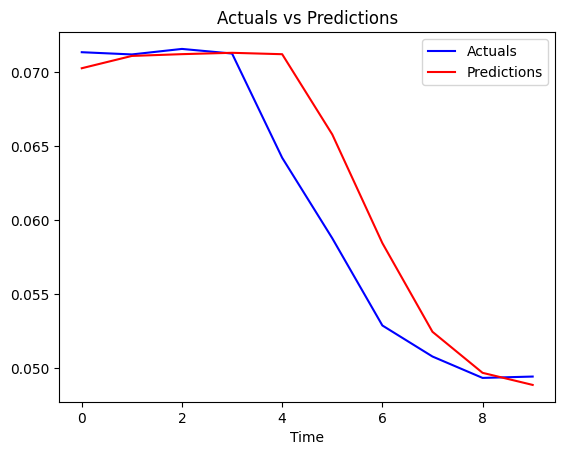

In [69]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=10):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

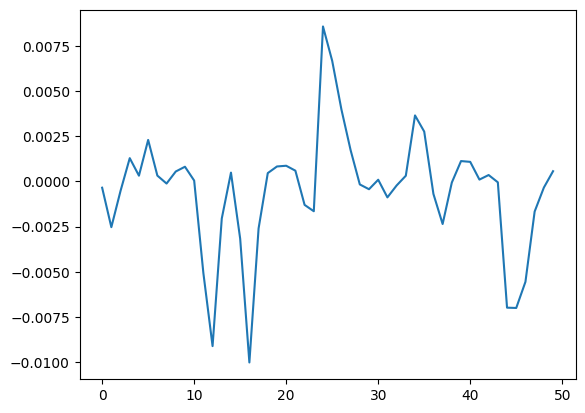

In [70]:
# Compute and plot the test data errors
errors = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(errors)

## 2 Multistep point prediction

It is built for bootstrapping

In [71]:
def multistep_prediction(H, model, X_pred,residuals=[]):
    # Initialise lists for storing multi-step predictions
    y_pred_multi = []
    X_pred_multi = []

    for t in range(H):
        # get next prediction
        X_pred = np.array(X_pred.reshape(1,len(X_pred)))
        new_y= float(model.predict(X_pred))
        # print("new_y")
        # print(new_y)
    
        # update 
        y_pred_multi.append(float(new_y))
        X_pred_multi.append(list(X_pred[0])) 
        # print("y_pred_multi")
        # print(y_pred_multi)
        # print("X_pred_multi")
        # print(X_pred_multi)
    
        # prepare net input with bootstrapped training residuals
        X_pred = X_pred_multi[t][:-1]
        if len(residuals) == 0:
            X_pred.insert(0,new_y)
        else:
            X_pred.insert(0,(new_y+np.random.choice(residuals)))
        X_pred = np.array(X_pred)
        # print("new X")
        # print(X_pred)
        
    return y_pred_multi, X_pred_multi

Now generate the multistep prediction:

1/1 [==============================] - 0s 14ms/step


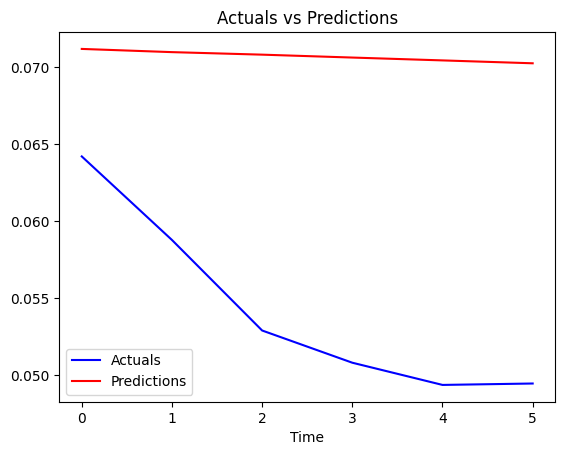

In [72]:
# Prediction horizon
H = 6

X_test_multi = X_test[-H:,:]
y_test_multi = y_test[-H:]
# y_pred_multi = model.predict(X_test_multi)    
# plot_pred(y_test_multi,y_pred_multi)

# Prepare first input to multistep prediction loop
X_pred = X_test_multi[0,:]

# Multistep prediction
y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred)
plot_pred(y_test_multi, y_pred_multi)

## Bootstrapping for interval predictions using neural networks

In [73]:
import sklearn.metrics as metrics

In [74]:
residuals = np.squeeze(y_train) - np.squeeze(model.predict(X_train))

158/158 [==============================] - 0s 503us/step


In [75]:
# Bootstrap iterations
K = 100

# Prepare first input to multistep bootsrtap loop
X_pred = X_test_multi[0,:]
y_pred_bootstrap = []

# Use multistep prediction to generate bootstrap data, 
# List of training residuals to sample from passed in as fourth argument 

for k in range(K):
    y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred,residuals)
    y_pred_bootstrap.append(y_pred_multi)
    # store y predictions

1/1 [==============================] - 0s 14ms/step


## 3.2 Visualising bootstrapped interval forcasts

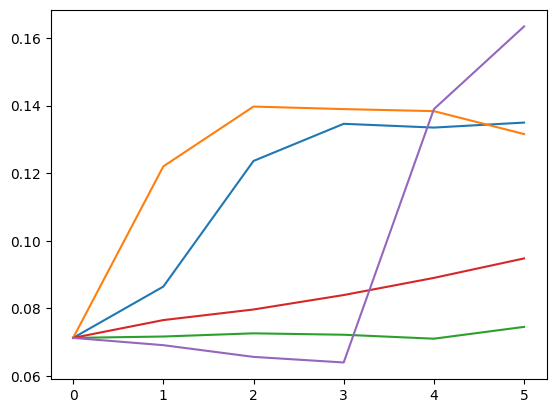

In [76]:
# Useful utility method for transposing lists of lists    
def transposed_2d_list(l):
    return [[row[i] for row in l] for i in range(len(l[0]))]    

plt.plot(transposed_2d_list(y_pred_bootstrap[-5:]))

In [77]:
bootstrap_predictions = pd.DataFrame(index = data.index.values[-H:])

for pctl in range(0,101,10):
    bootstrap_predictions[str(pctl)] = np.percentile(y_pred_bootstrap,pctl,axis=0)

bootstrap_predictions.rename(columns={'50': "median"}, inplace=True)
bootstrap_predictions['actuals'] = y_test[-H:]

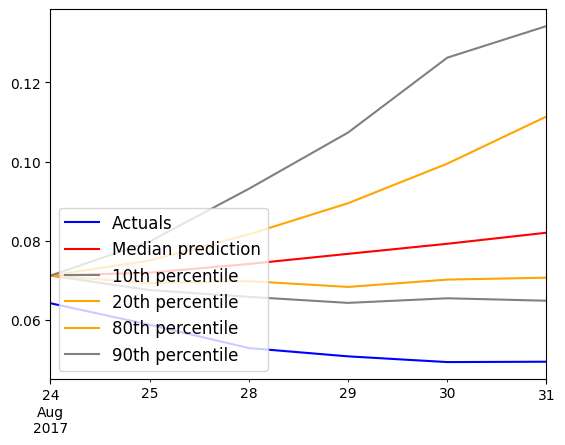

In [78]:
# plot some deciles
fig, ax_bootstrap_2 = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap_2)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap_2 )
bootstrap_predictions['10'].plot(color = 'grey',label = '10th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['20'].plot(color = 'orange',label = '20th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['80'].plot(color = 'orange',label = '80th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['90'].plot(color = 'grey',label = '90th percentile', axes=ax_bootstrap_2 )
plt.legend(loc = 'lower left', fontsize = 12)

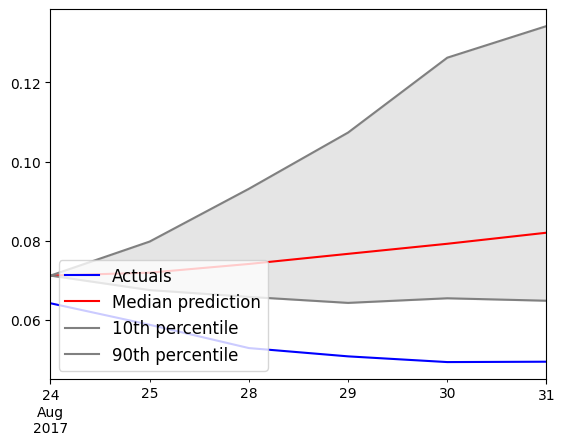

In [79]:
# plot interval with fill
fig, ax_bootstrap = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap )
bootstrap_predictions['10'].plot(color = 'grey', label = '10th percentile', axes=ax_bootstrap )
bootstrap_predictions['90'].plot(color = 'grey', label = '90th percentile', axes=ax_bootstrap )
plt.legend(loc = 'lower left', fontsize = 12)

x = data.index.values[-H:]
plt.fill_between(x, bootstrap_predictions['10'], bootstrap_predictions['90'], color='grey', alpha=0.2)

# question 6

In [80]:
# pre = np.array(y_pred[:-2]).astype(int)
test_n = np.delete(test,[1,2,3,4],1)

print("for pure forecasters")
mae = metrics.mean_absolute_error(test_n, y_pred)
mse = metrics.mean_squared_error(test_n, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(test_n,y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("---------------")
print("for model-based forecaster")
test_n = test_n[0:-2]
model_based  = np.array(arima_predictions['trend'])

mae = metrics.mean_absolute_error(test_n, model_based)
mse = metrics.mean_squared_error(test_n, model_based)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(test_n,model_based)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


for pure forecasters
MAE: 3931071.4414859964
MSE: 15637741062540.32
RMSE: 3954458.377899598
R-Squared: -83.7949100523122
---------------
for model-based forecaster
MAE: 697498.8649102122
MSE: 651939754595.1173
RMSE: 807427.8634002652
R-Squared: -2.7772913491747415


as we can see the results given above, both MAE and MSE of pure forecasters is larger than numbers of model-based forecasters, but for model based forecasters trainning residuals are correlated shown in task4, therefore, i think pure forecasters is better for this predication.
<br> difference: 
<br> 1.pure forecasters is all based on nerual network, the process, we do not know, the only things controlled by us are input and output, but we can access more detail steps in mdoel based forecasters. 
<br> 2. pure forecaster is easy to implement,  mdoel based forecaster is more tedius. <br> similairty: 
<br> for this predication, both forecasters are not accurate for comparison with test data. 